In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras  # keras is a wrapper on tensorflow. Keras is a high level api compared to tensprflow

In [2]:
mnist = pd.read_csv(r'D:\Datasets\MNIST_Train.csv')

In [3]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist = mnist.iloc[:, 1:]

In [5]:
mnist.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist = np.array(mnist)

In [7]:
var1 = mnist[3]

In [8]:
var1 = var1.reshape(28, 28)
var1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 220, 179,   6,   0,   0,   0,   0,
          0,   0,   0,   0,   9,  77,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

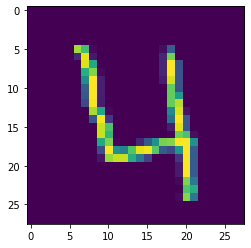

In [9]:
plt.imshow(var1)

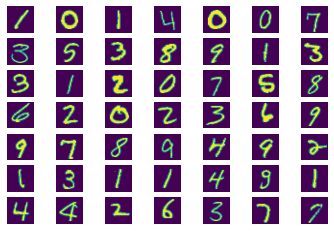

In [10]:
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.imshow(mnist[i,:].reshape(28,28))
    plt.axis('off')

In [11]:
# model building

In [12]:
mnist = pd.read_csv(r'D:\Datasets\MNIST_Train.csv')

In [13]:
mnist_x = mnist.iloc[:, 1:]
mnist_y = mnist.iloc[:, 0]

In [14]:
from sklearn.model_selection import train_test_split

mnist_x_train, mnist_x_test, mnist_y_train, mnist_y_test = train_test_split(mnist_x, mnist_y, test_size = .2)

In [15]:
print(mnist_x_train.shape)
print(mnist_y_train.shape)

(33600, 784)
(33600,)


In [16]:
print(mnist_x_test.shape)
print(mnist_y_test.shape)

(8400, 784)
(8400,)


In [17]:
mnist_x_train = tf.keras.utils.normalize(mnist_x_train)
mnist_x_test = tf.keras.utils.normalize(mnist_x_test)

# This step is not mandatory but if we normalize it, we get better performance/results

In [18]:
mnist_x_train = np.array(mnist_x_train)
mnist_x_test = np.array(mnist_x_test)
mnist_y_train = np.array(mnist_y_train)

# In NEURAL networks, data has to be in the array format and not in he dataframe format

In [19]:
def build_model():
    model = tf.keras.models.Sequential()  # model is initialized
    model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 1st hidden layer
    model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 2nd hidden layer
    model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 3rd hidden layer
    model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # 10 is not hyper parameter
                                                                 # number of levels in target variable 
    
    
    model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [20]:
# model = tf.keras.models.Sequential()  # model is initialized
# model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 1st hidden layer
# model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 2nd hidden layer
# model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # 3rd hidden layer
# model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) # 10 is not hyper parameter
#                                                                  # number of levels in target variable

In [21]:
# model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# # adam is optimizer like GD

In [22]:
model = build_model();
model1 = model.fit(mnist_x_train, mnist_y_train, epochs =  25, validation_split = .2, batch_size=62)

dict1 = model1

Epoch 1/25
434/434 [==============================] - 3s 7ms/step - loss: 0.5180 - accuracy: 0.8532 - val_loss: 0.2326 - val_accuracy: 0.9292
Epoch 2/25
434/434 [==============================] - 2s 5ms/step - loss: 0.1921 - accuracy: 0.9404 - val_loss: 0.1942 - val_accuracy: 0.9376
Epoch 3/25
434/434 [==============================] - 2s 4ms/step - loss: 0.1380 - accuracy: 0.9585 - val_loss: 0.1394 - val_accuracy: 0.9567
Epoch 4/25
434/434 [==============================] - 2s 4ms/step - loss: 0.1058 - accuracy: 0.9672 - val_loss: 0.1385 - val_accuracy: 0.9609
Epoch 5/25
434/434 [==============================] - 2s 3ms/step - loss: 0.0803 - accuracy: 0.9748 - val_loss: 0.1112 - val_accuracy: 0.9659
Epoch 6/25
434/434 [==============================] - 1s 2ms/step - loss: 0.0624 - accuracy: 0.9805 - val_loss: 0.1035 - val_accuracy: 0.9695
Epoch 7/25
434/434 [==============================] - 2s 4ms/step - loss: 0.0493 - accuracy: 0.9841 - val_loss: 0.1261 - val_accuracy: 0.9647
Epoch 

In [23]:
pred_classes = model.predict(mnist_x_test)
pred_classes = np.argmax(pred_classes, axis=1)
pred_classes

array([0, 6, 4, ..., 7, 3, 4], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(mnist_y_test, pred_classes)
cm

array([[826,   0,   1,   0,   0,   0,   3,   1,   3,   0],
       [  0, 895,   4,   1,   1,   0,   1,   3,   4,   0],
       [  4,   3, 810,   3,   2,   0,   0,  10,   5,   2],
       [  4,   1,  10, 828,   0,   4,   0,   2,  10,   3],
       [  3,   4,   0,   0, 786,   2,   3,   0,   2,   7],
       [  2,   1,   0,  11,   2, 721,  10,   1,   7,   1],
       [  5,   4,   3,   0,   3,   2, 821,   1,   2,   0],
       [  3,   3,   4,   1,   2,   3,   0, 874,   0,   4],
       [  2,   9,   1,   6,   2,   4,   1,   0, 814,   1],
       [  5,   4,   0,   3,   8,   1,   0,  11,   5, 781]], dtype=int64)

In [29]:
dict1 = model1.history

In [30]:
dict1 = pd.DataFrame(dict1)

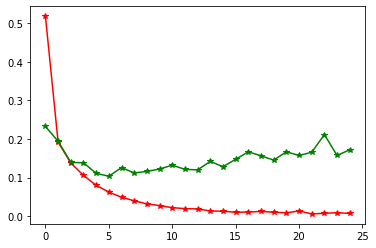

In [31]:
plt.plot(dict1.loss, color='r', label = 'loss' , marker='*')
plt.plot(dict1.val_loss, color='g', label = 'val_loss', marker='*')